# Portfolio Methodolgy

1. DGI/Growth Names - Rebalance every 6 months picking around 2 - 3 names from CA and US universe
    - Sell Covered Calls on names and re-enter if called away.
    - **GTC Stop Limit of 5% on each name**
2. VAA/PAA - Rebalance every month on trading day 1
3. LEAPS - Rebalance every 3 months picking around 3 - 8 names from US universe (high growth potential names)
    - Current Holdings: LOPE STOR PNW SBUX
    - LOPE Earnings: Nov 8
    - PNW Earnings: Nov 8
    - SBUX Earnings: Jan 23
        - **Exit Criteria: When the call option drops below 60 delta**
4. Short Vol - Short SPX Spreads at the beginning of the month and hold until second or last week to maturity
    - Potentially long UVXY/VXX puts at beginning of the month with bracket orders
    - **Short ATM SPX Put spreads around 25 points wide**
        - **Long bi-weekly unit puts, around -7% or so of SPX spot (or something with a cost of 15% of the credit)**
        - **The SPX put spread will have a capped max loss of 2,500 per contract, while in low volatility, the bi-weekly units are severely underpriced and will explode 10X to 20X in value if the long strike in the spread gets tested. Vega and Gamma play a huge factor in the repricing of these units.**
        - Initiate the units every 2 weeks letting them run to expiry
5. Barbell Hedging
    - Long SPX puts or VIX calls during high crisis potential moments
        - Initiate bracket orders with SPX Puts: +/- 30% of Cost Basis
    - Check VIX Futures volume trends and see impact of Feb 5, 2018
    - Only trade 4 naked SPX puts in Reg accounts
        - Sell half into profits/losses 
    - Only trade 6 3:1 Put back ratios in Reg Account: Leg into these positions because of how illiquid the market is
    - Take losses immediately (10% - 30% of Cost Basis)
    - NEVER EVER try to put on a position of the market is illiquid: YOU WILL get filled at horrible prices
    - **Put on 1-5 Delta strangles on the open of the day and close position at the end of the day around 2 pm to 3 pm**
6. Treasuries - Re-establish monthly bills beginning of month or at maturity
7. Earnings
    - Filter stocks with market cap > 500M and with post-earnings returns greater than 2% in magnitude for at least 3 quarters
    - Then filter stocks whose options have bid-ask spreads less than 1 dollar ATM
    - Aggregate all insider share buys and sells and calculate the ratio Buy/Sells
        - Candidates for Puts have Buy/Sell < 0.5
        - Candidates for Calls have Buy/Sell > 2

##### Strategy Weights
|Strategy|Weight|Last Rebal|Next Check|Next Full Rebal|
|-|-|-|-|-|
|VAA/PAA|25%|11/01/2018|12/01/2018|12/01/2018|
|LEAPs|5%|11/01/2018|12/01/2018|01/01/2019|
|Short Vol|2%|NA|NA|NA|
|Barbell Hedging|1.5%|11/06/2018|11/09/2018|11/19/2018|
|Treasuries|60%|11/01/2018|11/29/2018|12/01/2018|

## Key Modules to Run

- fundamental_data_collect.py to run monthly to collected latest financial statements and key stats from yahoo
- finstatement_cleaning.py to run right after fundamental_data_collect.py to create cleaned data for earnings plays



In [1]:
# Importing necessary models
import warnings
warnings.filterwarnings('ignore')

import smtplib
import pandas as pd
import numpy as np
import datetime as dt
import pandas.stats.moments as st
import time
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import os
main_dir = os.getcwd()

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\DataCollection')

from alphavantage import *
from yahoo_query import *
from option_slam_earnings import *
from reuters_query import reuters_query
from alphaquery import alphaquery

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Options')
from optionsFunctions import *

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Earnings')
from yahoo_earnings import *
from lookup_earnings import lookup_earnings

os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Trading\\Modules\\Processing')
from hv_calc import *

os.chdir(main_dir)

# Allocate Smartly Checking

In [250]:
# Short Call Assignment Price - 287.5

portfolio_value =  200000

as_lst = ['DBC',
        'HYG',
        'IEF',
        'IWM',
        'LQD',
        'QQQ',
        'SPY',
        'VNQ']
as_wgt = [0.014,
        0.014,
        0.417,
        0.014,
        0.500,
        0.014,
        0.014,
        0.014]

as_df = pd.DataFrame({'Allocation': as_wgt}, index = as_lst)
curr_spot = curr_batch_quotes(as_lst)
as_df = pd.concat([as_df,curr_spot[['price']]], axis = 1)

as_df['Market Value'] = portfolio_value*as_df.Allocation
as_df['Holdings'] = np.round(as_df['Market Value']/as_df.price,0)

as_df

,Allocation,price,Market Value,Holdings
symbol,,,,
DBC,0.014,16.705,2800.0,168.0
HYG,0.014,84.540,2800.0,33.0
IEF,0.417,99.930,83400.0,835.0
IWM,0.014,154.610,2800.0,18.0
LQD,0.500,112.145,100000.0,892.0
QQQ,0.014,170.710,2800.0,16.0
SPY,0.014,275.550,2800.0,10.0
VNQ,0.014,79.585,2800.0,35.0


## Checking market correlations

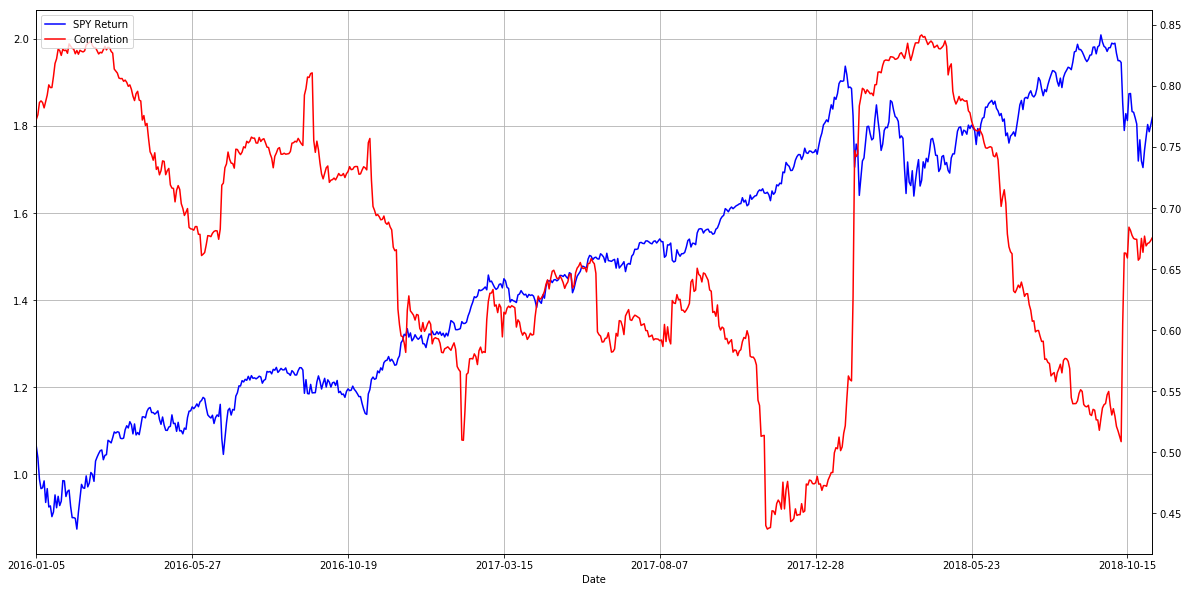

                XLRE       XLV       XLI       XLK       XLP       XLU  \
2018-10-31  0.395356  0.908453  0.852474  0.916932  0.415250 -0.006917   
2018-11-01  0.399878  0.910993  0.856426  0.917836  0.427726 -0.016608   
2018-11-02  0.404528  0.911463  0.855520  0.914758  0.431493 -0.010320   
2018-11-05  0.406407  0.911579  0.855287  0.911142  0.435100  0.000804   
2018-11-06  0.410559  0.912896  0.856025  0.912025  0.438923  0.009735   

                 XLB       XLF       XLE       XLY  Avg_Corr   SPY_cum  
2018-10-31  0.759625  0.813259  0.729650  0.906124  0.669021  1.773914  
2018-11-01  0.759765  0.812704  0.734797  0.907035  0.671055  1.803434  
2018-11-02  0.761571  0.811104  0.735113  0.901108  0.671634  1.786829  
2018-11-05  0.760761  0.807639  0.746910  0.898857  0.673448  1.802204  
2018-11-06  0.761025  0.809330  0.748661  0.898487  0.675767  1.819833  


In [251]:
rolling_window = 60
plot_window = 10000

corr_df, sector_df = check_mkt_corr(rolling_window, plot_window)
print(corr_df.tail())

In [252]:
((sector_df.dropna() + 1).cumprod()-1).tail()

,SPY,XLRE,XLV,XLI,XLK,XLP,XLU,XLB,XLF,XLE,XLY,XLC
2018-10-31,-0.017677,0.018730,0.045251,-0.045746,-0.029819,0.077360,0.069735,-0.100530,-0.039122,-0.101418,-0.057255,-0.078463
2018-11-01,-0.007223,0.022540,0.058449,-0.028950,-0.018480,0.084998,0.064953,-0.075227,-0.034735,-0.093792,-0.038021,-0.073058
2018-11-02,-0.013103,0.013968,0.051850,-0.030589,-0.037659,0.079318,0.058976,-0.077449,-0.035466,-0.096066,-0.034085,-0.082466
2018-11-05,-0.007659,0.030794,0.061160,-0.025536,-0.038639,0.092832,0.073919,-0.074714,-0.020110,-0.080947,-0.032743,-0.086269
2018-11-06,-0.001416,0.036508,0.066580,-0.015294,-0.032619,0.099295,0.081490,-0.059497,-0.014991,-0.076666,-0.028449,-0.080865


## Earnings

In [2]:
month = 11
year = 2018
days_list = list(range(12, 17)) + list(range(19, 22)) #

week_earnings = []

for i in days_list:
    date_lookup = '{0}-{1}-{2}'.format(year,month,i)
    curr_earnings = date_earnings(date_lookup)
    curr_earnings = curr_earnings[curr_earnings['Call Time'].isin(['After Market Close', 'Before Market Open'])]
    curr_earnings['EarningsDate'] = date_lookup
    week_earnings.append(curr_earnings)
    
curr_earnings = pd.concat(week_earnings,axis = 0)

focus_names = []
max_spread = 1

for ticker in curr_earnings.index:
    try:
        curr_options = all_options(ticker, 100, 1)
    except:
        curr_options = []
    
    if len(curr_options) == 0:
        continue
    elif (curr_options['Ask'] - curr_options['Bid']).mean() <= max_spread:
        focus_names.append(ticker)
    else:
        continue
        
curr_earnings = curr_earnings[curr_earnings.index.isin(focus_names)]

In [3]:
acs = curr_earnings[curr_earnings['Call Time'] == 'After Market Close']
bcs = curr_earnings[curr_earnings['Call Time'] == 'Before Market Open']
curr_earnings

,Call Time,EPS Estimate,Name,EarningsDate
ATHM,Before Market Open,0.81,Autohome Inc,2018-11-12
ACM,Before Market Open,0.82,AECOM,2018-11-12
NHC,Before Market Open,-,National Healthcare Corp,2018-11-12
KRNT,After Market Close,0.11,Kornit Digital Ltd,2018-11-12
NVGS,After Market Close,-0.02,Navigator Holdings Ltd,2018-11-12
HUYA,After Market Close,0.04,HUYA Inc,2018-11-12
YY,After Market Close,1.67,YY Inc,2018-11-12
YRD,After Market Close,0.52,Yirendai Ltd,2018-11-12
AAP,Before Market Open,1.75,Advance Auto Parts Inc,2018-11-13
PLCE,Before Market Open,3.06,Childrens Place Inc,2018-11-13


In [4]:
tracking_list = []

for ticker in focus_names:
    curr_reuters = reuters_query(ticker)
    curr_earnings_report = earnings_report(ticker).dropna()
    break

No insiders_txns for ATHM


In [5]:
curr_reuters.LTgrowth_ests
curr_reuters.valuations
curr_eps = curr_reuters.earnings_surprises
curr_eps['Surprise %'] = (curr_eps['Actual'] - curr_eps['Estimate'])/abs(curr_eps['Estimate'])
curr_eps = curr_eps.join(curr_earnings_report.dropna().sort_index(ascending = False).reset_index())
curr_eps.columns = ['Actual', 'Difference', 'Estimate', 'ReportDate', 'Surprise %',
                    'Underlying', 'EPS Report Date', 'Call Time', 'closeToOpenReturn', 'Sector Beta',
                    'MarketBeta', '52WeekReturn', 'SPY_52WeekReturn',
                    'Sector_52WeekReturn']
curr_eps

,Actual,Difference,Estimate,ReportDate,Surprise %,Underlying,EPS Report Date,Call Time,closeToOpenReturn,Sector Beta,MarketBeta,52WeekReturn,SPY_52WeekReturn,Sector_52WeekReturn
0,0.91,0.05,0.87,Quarter Ending Jun-18,0.045977,ATHM,2018-08-08,BO,-0.002509,1.179495,1.544816,0.932121,0.152136,0.266218
1,0.69,0.07,0.61,Quarter Ending Mar-18,0.131148,ATHM,2018-05-08,BO,-0.027458,1.010892,1.310536,1.768004,0.113559,0.238676
2,1.03,0.37,0.67,Quarter Ending Dec-17,0.537313,ATHM,2018-03-07,BO,-0.048301,1.003296,1.106245,1.467235,0.147953,0.298219
3,0.60,0.05,0.56,Quarter Ending Sep-17,0.071429,ATHM,2017-11-07,BO,-0.047055,1.095084,1.336439,1.548749,0.241189,0.377869
4,0.72,0.20,0.52,Quarter Ending Jun-17,0.384615,ATHM,2017-08-09,BO,0.062475,0.030307,-0.208040,1.166955,0.133960,0.230442


In [6]:
surprise_corr = curr_eps[['Surprise %','closeToOpenReturn']].corr().iloc[0,1]
surprise_corr

0.14390306386102705

In [563]:
start_time = time.time()

start_date = dt.datetime(2018,1,1)

earnings_data = lookup_earnings(focus_names, start_date)

print("--- %s seconds ---" % (time.time() - start_time))

50.00% Completed
No insiders_txns for AZRE
--- 71.13259243965149 seconds ---


In [564]:
#################### Preliminary Name Selection ###################################
summary_df = earnings_data[1]
summary_df = summary_df[summary_df['Market Cap(Mil.)'] > 500].sort_values('Market Cap(Mil.)')

eps_df = earnings_data[0]
eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_df['NegativeSurprise'] = eps_df['surprisePercent'] < 0 
eps_df['PositiveSurprise'] = eps_df['surprisePercent'] > 0
eps_df['returnDifferentFromEPS'] = eps_df['surprisePercent']*eps_df['Stock_closeToOpen'] < 0
eps_df['LargeMoves'] = abs(eps_df['Stock_closeToOpen']) > 0.02

eps_corr = eps_df[['Underlying','NegativeSurprise',
                   'PositiveSurprise',
                   'returnDifferentFromEPS']].groupby('Underlying').sum()
eps_corr['surpriseReturnCorrelation'] = np.nan
corrs = []
for ticker in eps_corr.index:
    curr_corr = eps_df[eps_df['Underlying'] == ticker]
    corrs.append(curr_corr[['surprisePercent','Stock_closeToOpen']].corr().iloc[0,1])
eps_corr['surpriseReturnCorrelation'] = corrs
eps_corr['LargeMoves'] = eps_df[['Underlying','LargeMoves']].groupby('Underlying').sum()

selected_names = eps_corr[eps_corr['LargeMoves'] > 2].index.tolist()

#################### Filtering on Preliminary Name Selection ###################################
summary_df = summary_df[summary_df.index.isin(selected_names)]

eps_df = eps_df[eps_df.Underlying.isin(summary_df.index)]
eps_corr = eps_corr[eps_corr.index.isin(summary_df.index)]

scores_df = earnings_data[2]
scores_df = scores_df[scores_df.index.isin(summary_df.index)]
scores_df['TotalScore'] = scores_df.mean(axis = 1)
scores_df = scores_df.sort_values('TotalScore')

analyst_df = earnings_data[3]
analyst_df = analyst_df[analyst_df.index.isin(summary_df.index)]

valuations_df = earnings_data[4]
valuations_df = valuations_df[valuations_df.Underlying.isin(summary_df.index)]

growthrate_df = earnings_data[5]
growthrate_df = growthrate_df[growthrate_df.Underlying.isin(summary_df.index)]

profitability_df = earnings_data[6]
profitability_df = profitability_df[profitability_df.Underlying.isin(summary_df.index)]

finstrength_df = earnings_data[7]
finstrength_df = finstrength_df[finstrength_df.Underlying.isin(summary_df.index)]

perf_df = earnings_data[8]
perf_df = perf_df[perf_df.Underlying.isin(summary_df.index)]

rev_revisions_df = earnings_data[9]
rev_revisions_df = rev_revisions_df[rev_revisions_df.Underlying.isin(summary_df.index)]

earnings_revisions_df = earnings_data[10]
earnings_revisions_df = earnings_revisions_df[earnings_revisions_df.Underlying.isin(summary_df.index)]

insider_trades = earnings_data[11]
insider_trades = insider_trades[insider_trades.Underlying.isin(summary_df.index)]
insider_trades['Trading Date'] = pd.to_datetime(insider_trades['Trading Date'])
def aggregate_txns_date(trade_date):
    
    trade_month = trade_date.month
    trade_year = trade_date.year
    if trade_month <= 3:
        return dt.datetime(trade_year,3,31).date()
    elif trade_month <= 6:
        return dt.datetime(trade_year,6,30).date()
    elif trade_month <= 9:
        return dt.datetime(trade_year,9,30).date()
    else:
        return dt.datetime(trade_year,12,31).date()
    
insider_trades['Trading Date'] = insider_trades['Trading Date'].apply(aggregate_txns_date)

growth_sums = earnings_data[12]
growth_sums = growth_sums[growth_sums.Underlying.isin(summary_df.index)]


In [499]:
selected_names = scores_df.sort_values(['ValuationScore','TotalScore']).index.tolist()

options_dict = {}

for name in selected_names:
    
    try:
        curr_options = all_options(name,100,1,moneyness=0.1)
        if len(curr_options) > 0 and (curr_options['Ask'] - curr_options['Bid']).mean() < 1:
            options_dict[name] = curr_options
    except:
        None
        
selected_names = list(options_dict.keys())

In [506]:
vols_list = []

for selected_name in selected_names:
    curr_vol = historical_data(selected_name, dt.datetime(2018,1,1))[['daily_ann','intra_ann','ovrnt_ann']].tail(1)
    curr_vol.index = [selected_name]
    
    aq = alphaquery(selected_name)
    
    curr_iv = aq.vol_df.loc[['Implied Volatility (Calls)', 'Implied Volatility (Puts)', 
                             'Put-Call Implied Volatility Ratio',
                             'Implied Volatility Skew'],['20-Day']].T
    curr_iv.index = [selected_name]
    vols_list.append(curr_vol.join(curr_iv))
    
hv_df = pd.concat(vols_list,axis = 0)

In [551]:
insider_agg_lst = []


for selected_name in selected_names:
    curr_insider_agg = insider_trades[insider_trades.Underlying == selected_name].groupby(['Type']).agg({'Shares Traded': 'sum'}).T
    curr_insider_agg.index = [selected_name]
    insider_agg_lst.append(curr_insider_agg)
    
insider_agg = pd.concat(insider_agg_lst,axis = 0)
insider_agg['BuyToSell'] = insider_agg['Buy']/insider_agg['Sell']


further_reduce = hv_df[(hv_df['intra_ann'] > hv_df['Implied Volatility (Calls)']) &
                       (hv_df['intra_ann'] > hv_df['Implied Volatility (Puts)'])].dropna().sort_values('intra_ann').join(insider_agg,
                                                                                                        how = 'inner')
selected_names = further_reduce.index.tolist()
curr_shares_out = summary_df[summary_df.index.isin(selected_names)][['Shares Outstanding(Mil.)']]*1000000
further_reduce#.join(summary_df[summary_df.columns.tolist()[5:]], how = 'inner')


,daily_ann,intra_ann,ovrnt_ann,Implied Volatility (Calls),Implied Volatility (Puts),Put-Call Implied Volatility Ratio,Implied Volatility Skew,Buy,Gift,Sell,BuyToSell
WMT,0.200424,0.350043,0.088230,0.2530,0.2540,1.0040,0.0529,8596.0,1204754.0,23466139.0,0.000366
CUB,0.283755,0.518515,0.146954,0.4670,0.4780,1.0236,0.2243,196856.0,NaN,78608.0,2.504274
CSCO,0.352216,0.539624,0.174579,0.3011,0.3009,0.9993,0.1139,7201852.0,NaN,6106940.0,1.179290
ENR,0.348321,0.566717,0.138759,0.4235,0.4353,1.0279,0.1517,1524639.0,NaN,770833.0,1.977911
JWN,0.380545,0.598299,0.129917,0.5038,0.5321,1.0562,0.0618,2205837.0,16650000.0,2510163.0,0.878762
AAP,0.346569,0.614355,0.160935,0.5601,0.5640,1.0070,0.0475,3391.0,NaN,501.0,6.768463
PLCE,0.523208,0.722018,0.434856,0.4833,0.4848,1.0031,0.0533,137035.0,NaN,1659555.0,0.082573
M,0.436617,0.748151,0.160351,0.5715,0.5707,0.9986,0.0688,236652.0,NaN,163068.0,1.451247
NTAP,0.521246,0.771948,0.324153,0.4703,0.4652,0.9892,0.0697,167916.0,NaN,381153.0,0.440547
AMAT,0.524171,0.971661,0.344642,0.4098,0.4489,1.0954,0.0717,539935.0,NaN,1226170.0,0.440343


In [557]:
# Writing to Excel
os.chdir('C:\\Users\\Fang\\Desktop\\Python Trading\\Trading\\Data\\Historical Queries\\Earnings')
writer = pd.ExcelWriter('earnings-2018-11-12 to 17.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
further_reduce.join(summary_df[summary_df.columns.tolist()[5:]], 
                    how = 'inner').join(curr_earnings).to_excel(writer, sheet_name='Summary')

eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying').to_excel(writer, sheet_name='EarningsHist')



selected_names = shorts + longs#

for selected_name in selected_names:
    print(selected_name)
    for i, df in enumerate(earnings_data):
        if i == 2 or i == 3 or i == 1:
            None #print(df[df.index == selected_name])
        elif i == 11:
            #print(df[df.Underlying == selected_name][df.columns.tolist()[1:-1]])
            insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                      'Type']).agg({'Underlying':'count',
                                                                                                    'Shares Traded': 'sum'}).to_excel(writer, sheet_name='{} Txns'.format(selected_name))
            print(insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                      'Type']).agg({'Underlying':'count',
                                                                                                    'Shares Traded': 'sum'}))
        else:
            print(df[df.Underlying == selected_name])
        print('\n')
        
# Close the Pandas Excel writer and output the Excel file.
writer.save()
os.chdir(main_dir)

NTAP
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.81          0.12        0.69            0.174       NTAP 2017-10-31   
1      0.99          0.08        0.91            0.088       NTAP 2018-01-31   
2      1.05          0.04        1.01            0.040       NTAP 2018-04-30   
3      1.04          0.24         0.8            0.300       NTAP 2018-07-31   

   Stock_closeToOpen EarningsDate  
0           0.121999   2017-11-15  
1          -0.100099   2018-02-14  
2          -0.041773   2018-05-23  
3          -0.036134   2018-08-15  








   Company                         Field  industry  sector Underlying
0    20.52               P/E Ratio (TTM)     16.15   10.67       NTAP
1    30.66        P/E High - Last 5 Yrs.     27.27   22.68       NTAP
2    19.10         P/E Low - Last 5 Yrs.     12.91    9.97       NTAP
3     1.37                          Beta      0.80    1.10       NTAP
4     3.44          Price to Sales (TTM)      0.89  257.


AMAT
  epsActual epsDifference epsEstimate  surprisePercent Underlying    Quarter  \
0      0.93          0.02        0.91            0.022       AMAT 2017-10-31   
1      1.06          0.08        0.98            0.082       AMAT 2018-01-31   
2      1.22          0.08        1.14            0.070       AMAT 2018-04-30   
3       1.2          0.03        1.17            0.026       AMAT 2018-07-31   

   Stock_closeToOpen EarningsDate  
0           0.045297   2017-11-16  
1           0.003849   2018-02-14  
2          -0.068013   2018-05-17  
3          -0.056083   2018-08-16  








   Company                         Field  industry  sector Underlying
0     8.09               P/E Ratio (TTM)     12.75   10.67       AMAT
1    84.31        P/E High - Last 5 Yrs.     23.42   22.68       AMAT
2    14.64         P/E Low - Last 5 Yrs.     15.22    9.97       AMAT
3     1.62                          Beta      1.00    1.10       AMAT
4     1.99          Price to Sales (TTM)      2.27  257








   Company                         Field  industry  sector Underlying
0      NaN               P/E Ratio (TTM)     25.20   21.39        CUB
1   729.58        P/E High - Last 5 Yrs.     31.36   38.19        CUB
2    18.08         P/E Low - Last 5 Yrs.     15.07   15.08        CUB
3     1.11                          Beta      0.92    1.02        CUB
4     1.45          Price to Sales (TTM)      2.41    2.14        CUB
5     2.72           Price to Book (MRQ)      7.27    2.38        CUB
6     6.69  Price to Tangible Book (MRQ)      2.03    5.90        CUB
7    44.37      Price to Cash Flow (TTM)     18.06   13.23        CUB


   Company                                 Field  industry  sector Underlying
0    11.28         Sales (MRQ) vs Qtr. 1 Yr. Ago      8.66    9.38        CUB
1     1.06          Sales (TTM) vs TTM 1 Yr. Ago      8.31   16.61        CUB
2     1.14             Sales - 5 Yr. Growth Rate      5.44    9.83        CUB
3   101.15           EPS (MRQ) vs Qtr. 1 Yr. Ago 

In [556]:
shorts = ['NTAP','NVDA', 'AMAT', 'WMT', 'PLCE']

longs = ['CUB', 'MTSI', 'SFS', 'CSCO', 'ENR', 'JWN','AAP','M']

print(scores_df[scores_df.index.isin(shorts + longs)])
print(eps_df[eps_df.Underlying.isin(shorts + longs)][['EarningsDate',
                                                      'surprisePercent',
                                                      'Underlying',
                                                      'Quarter',
                                                      'Stock_closeToOpen']].set_index('Underlying'))
print(analyst_df[analyst_df.index.isin(shorts + longs)].sort_values('Current'))


summary_df[summary_df.index.isin(shorts + longs)].T



      FinStrengthScore  GrowthRateScore  PerfRankScore  ProfitScore  \
SFS                0.0            42.86          31.21          0.0   
MTSI              40.0            28.57          18.79         20.0   
ENR                0.0             0.00          80.61         35.0   
AMAT              20.0            57.14          47.88         85.0   
CUB               60.0            42.86          73.33          5.0   
WMT                0.0             0.00          92.32          0.0   
AAP               60.0            28.57          64.04         55.0   
JWN               10.0            21.43          87.68         20.0   
NVDA              50.0            85.71          51.52         85.0   
CSCO              40.0             0.00          80.51         90.0   
M                 40.0             7.14          87.68         25.0   
NTAP              50.0            42.86          87.47         60.0   
PLCE              60.0            28.57          95.25         15.0   

     

,SFS,MTSI,CUB,PLCE,ENR,M,JWN,NTAP,AAP,AMAT,NVDA,CSCO,WMT
Beta,NaN,2.17,1.04,0.30,NaN,0.91,0.56,1.15,1.05,1.62,2.01,1.16,0.32
Dividend,NaN,NaN,0.14,0.40,0.28,0.38,0.37,0.20,0.06,0.20,0.15,0.33,0.51
EPS (TTM) Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EPS (TTM) Sector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EPS (TTM) Stock,0.12,-2.14,-1.18,6.97,3.01,2.21,3.28,2.08,5.91,4.31,6.64,2.15,4.16
High52Week,10.00,38.93,77.35,161.65,65.57,41.99,67.75,88.08,171.50,62.40,292.76,49.47,109.98
LastPrice,5.07,15.92,69.70,142.10,61.49,37.19,66.44,82.82,170.51,35.25,213.79,47.90,104.32
Low52Week,4.45,13.07,52.00,109.00,40.64,17.41,37.79,44.41,78.81,30.53,176.01,33.67,81.78
Market Cap(Mil.),577.36,1046.52,1433.66,2020.65,2870.55,6337.87,11371.43,11985.33,12452.32,34276.88,128324.50,212567.00,235988.91
P/E (TTM) Industry,40.62,12.75,45.40,34.85,28.51,60.60,55.48,16.77,21.20,12.75,7.59,12.36,40.62


In [541]:
selected_name = 'M'

aq = alphaquery(selected_name)
print(aq.vol_df)


select_trades = insider_trades[insider_trades.Underlying == selected_name].groupby(['Trading Date','Title',
                                                                                    'Type']).agg({'Underlying':'count',
                                                                                                  'Shares Traded': 'sum'}).reset_index()
select_trades['Percent of Float'] = 100*select_trades['Shares Traded']/curr_shares_out.loc[selected_name,'Shares Outstanding(Mil.)']
select_trades.groupby(['Trading Date','Title',
                       'Type']).agg({'Underlying':'count',
                                     'Shares Traded': 'sum',
                                     'Percent of Float': 'sum'})


                                         10-Day   20-Day   30-Day   60-Day  \
Field                                                                        
Historical Volatility (Close-to-Close)   0.4585   0.4146   0.4256   0.3619   
Historical Volatility (Parkinson)        0.3646   0.3857   0.3811   0.3411   
Implied Volatility (Calls)               0.7124   0.5715   0.5089   0.4269   
Implied Volatility (Puts)                0.7119   0.5707   0.5142   0.4765   
Implied Volatility (Mean)                0.7122   0.5711   0.5115   0.4517   
Put-Call Implied Volatility Ratio        0.9993   0.9986   1.0104   1.1162   
Implied Volatility Skew                  0.0979   0.0688   0.0568   0.0281   
Put-Call Ratio (Volume)                  1.3219   0.8742   0.2770   0.9449   
Put-Call Ratio (Open Interest)           2.5268   1.9342   0.9017   1.9788   
Forward Price                           37.0500  37.0800  37.0700  36.8700   
Call Breakeven Price                    39.5900  38.9500  39.540

Underlying  Shares Traded  \
Trading Date Title                   Type                              
2018-03-31   Director                Buy            1        60000.0   
                                     Sell           1        74874.0   
             Officer                 Buy            1        21570.0   
                                     Sell           1        21570.0   
2018-06-30   Chief Executive Officer Buy            1        20000.0   
2018-09-30   Director                Buy            1         4184.0   
             Officer                 Buy            1        21454.0   
                                     Sell           1         9256.0   
             President               Buy            1       109444.0   
                                     Sell           1        57368.0   

                                           Percent of Float  
Trading Date Title                   Type                    
2018-03-31   Director                Buy           0.019701  
                                     Sell          0.024584  
             Officer                 Buy           0.007082  
                                     Sell          0.007082  
2018-06-30   Chief Executive Officer Buy           0.006567  
2018-09-30   Director                Buy           0.001374  
             Officer                 Buy           0.007044  
                                     Sell          0.003039  
             President               Buy           0.035935  
                                     Sell          0.018836

## Barbell Hedging

In [ ]:
ratios = spx_put_backratios(50, 1, 0.2, 2, 25)

In [ ]:
ratios

In [ ]:
spx_options = all_greeks(all_options('^SPX',50,1,0.2))
spx_options = spx_options[(spx_options['Type'] == 'put') &
                          (spx_options['Strike'] < spx_options['Underlying_Price'])]

In [ ]:
spx_options[(spx_options['DTE'] == 7) &
            (spx_options['Strike'] == 2390.0)]